In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Income')

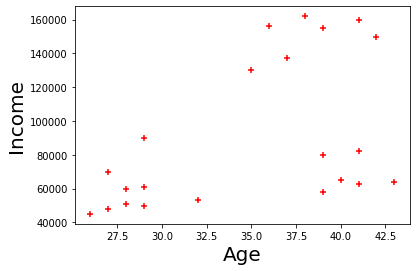

In [75]:
df = pd.read_csv('income.csv')
plt.scatter(df['Age'],df['Income($)'],color="red",marker="+")
plt.xlabel('Age',fontsize=20)
plt.ylabel('Income',fontsize=20)

In [76]:
from sklearn.cluster import KMeans
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [77]:
km = KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [78]:
y_pred = km.fit_predict(df[['Age','Income($)']])
y_pred

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [79]:
df['cluster'] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


Text(0, 0.5, 'Income($)')

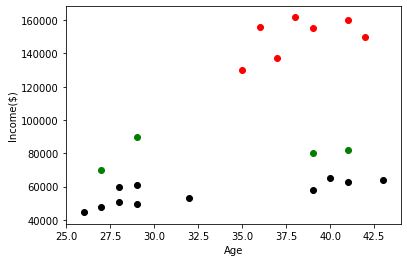

In [80]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')

plt.xlabel('Age')
plt.ylabel('Income($)')

In [81]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

In [82]:
from sklearn.preprocessing import MinMaxScaler

# Scaling features because of large difference b/w age and income columns

In [83]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
df.head()

,Name,Age,Income($),cluster
0,Rob,27,0.213675,0
1,Michael,29,0.384615,0
2,Mohan,29,0.136752,2
3,Ismail,28,0.128205,2
4,Kory,42,0.897436,1


In [84]:
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


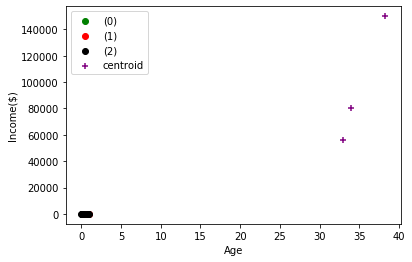

In [85]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green',label="(0)")
plt.scatter(df2.Age,df2['Income($)'],color='red',label="(1)")
plt.scatter(df3.Age,df3['Income($)'],color='black',label="(2)")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker="+",label="centroid")

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [86]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

# Elbow Plot

In [87]:
k_rng = range(1,11)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)
sse

[5.43401151198818,
 2.091136388699078,
 0.4750783498553096,
 0.3625079900797329,
 0.2621792762345213,
 0.21055478995472493,
 0.17796706251738345,
 0.13781880133764027,
 0.10497488680620906,
 0.08510915216361345]

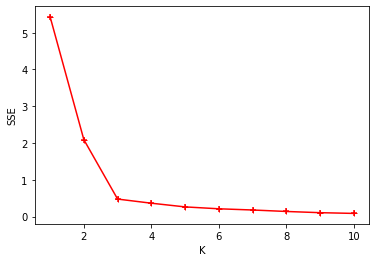

In [88]:
plt.ylabel('SSE')
plt.xlabel('K')
plt.scatter(k_rng,sse,color="red",marker="+")
plt.plot(k_rng,sse,color="red",marker="+")

In [89]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
iris = load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [90]:
%matplotlib inline

In [91]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [92]:
df.drop(['sepal length (cm)','sepal width (cm)'],axis='columns',inplace=True)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


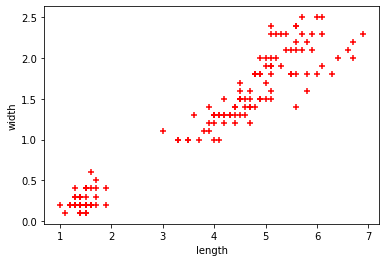

In [93]:
plt.xlabel('length')
plt.ylabel('width')
plt.scatter(df['petal length (cm)'],df['petal width (cm)'],color="red",marker="+")

In [102]:
km = KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [103]:
y_pred = km.fit_predict(df,iris.target)

In [104]:
km.cluster_centers_

array([[5.57346939e+00, 2.03265306e+00, 1.11022302e-16, 2.00000000e+00],
       [1.46200000e+00, 2.46000000e-01, 1.00000000e+00, 0.00000000e+00],
       [4.26470588e+00, 1.33333333e+00, 1.96078431e-02, 1.01960784e+00]])

In [105]:
df['cluster'] = y_pred
df.head()

,petal length (cm),petal width (cm),cluster,target
0,1.4,0.2,1,0
1,1.4,0.2,1,0
2,1.3,0.2,1,0
3,1.5,0.2,1,0
4,1.4,0.2,1,0


In [98]:
df['target'] = iris.target
df.head()

,petal length (cm),petal width (cm),cluster,target
0,1.4,0.2,1,0
1,1.4,0.2,1,0
2,1.3,0.2,1,0
3,1.5,0.2,1,0
4,1.4,0.2,1,0


In [99]:
df['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [100]:
df['cluster'].value_counts()

0    99
1    51
Name: cluster, dtype: int64

In [106]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

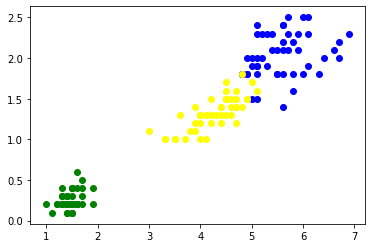

In [107]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='yellow')

# Elbow Plot

In [108]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

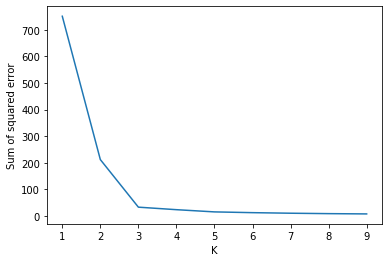

In [109]:

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)